In [1]:
import sys
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
from scipy import stats
import plotly
plotly.tools.set_credentials_file(username='anirudhn',
                                 api_key='uaV7Q410noAGBd4zvNTS')
%matplotlib inline  

In [2]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [3]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

In [4]:
index = 6
swc = trees['swc'][index]
tree = McNeuron.Neuron(swc)
tree.basic_features()
#McNeuron.visualize.plot_2D(tree, axis=(1,0,0), rotation=30)

In [5]:
#McNeuron.visualize.plot_3D(tree)

In [6]:
def splitBranches(tree) :
    branches = np.where(tree.features['branch order']>=2)[0]
    numOfBranch = len(branches)
    subsets = [0] * numOfBranch
    for i in range(0,numOfBranch) :
        rest_swc = tree.get_rest_of_neuron_after_node(branches[i])
        n = McNeuron.Neuron(rest_swc)
        n.l_measure_features()
        n.motif_features()
        n.geometrical_features()
        n.l_measure_features()
        subsets[i] = n.getNeuronVector()
    return subsets

In [7]:
def getTreeBranchMaster(location):
    ind = np.where(trees['location']==location)[0]
    treeBranchMaster = [0] * len(ind)
    for i in range (0,len(ind)) :
        tree = McNeuron.Neuron(trees['swc'][ind[i]])
        tree.basic_features()
        treeBranchMaster[i] = splitBranches(tree)
        print(ind[i])
    return treeBranchMaster

In [8]:
treeBranchMasterG = getTreeBranchMaster('Gabon')
print('done')
treeBranchMasterH = getTreeBranchMaster('Ghana')
print('done')
# treeBranchMasterU = getTreeBranchMaster('UK')
print('done')
treeBranchMasterW = getTreeBranchMaster('Wytham Meteoc (UK)')
print('done')

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:998: RuntimeWarning:

Mean of empty slice.

/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:990: RuntimeWarning:

Mean of empty slice.



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
done
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
done
done
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
done


In [9]:
def getFeature(feature, arr) :
    featureArray = [0] * len(arr)
    counter = 0
    for i in range(0, len(arr)) :
        x = [0] * len(arr[i])
        for j in range(0,len(arr[i])) :
            x[j] = arr[i][j][feature]
        featureArray[i-counter] = x
        if(len(x)==0) :
            featureArray = np.delete(featureArray,i)
            counter += 1
    return featureArray

In [85]:
def getFeatureAnalysisMatrixTree(feature, ran) :
    featureG = getFeature(feature,treeBranchMasterG)
    featureH = getFeature(feature,treeBranchMasterH)
    featureW = getFeature(feature,treeBranchMasterW)
    matrix = np.zeros((3,3))
    ref = [featureG,featureH,featureW]
    ind = [[0,0],[0,1],[0,2],[1,1],[1,0],[1,2],[2,2],[2,1],[2,0]]
    for v in range(0,9) :
        total = 0
        a = ref[ind[v][0]]
        b = ref[ind[v][1]]
        for i in range(0,20) :
            start = 0
            if v%3==0 :
                start = i
            for j in range(start,20) :
                pdf0 = np.histogram(a[i],normed=True, bins=20, range=ran)[0]
                pdf1 = np.histogram(b[j],normed=True, bins=20, range=ran)[0]
                pdf0 = pdf0/sum(pdf0)
                pdf1 = pdf1/sum(pdf1)
                if (stats.ks_2samp(pdf0,pdf1)[1] < 0.05) :
                    total += 1
        matrix[ind[v][0]][ind[v][1]] = total
        print(v)
    return matrix

In [217]:
getFeatureAnalysisMatrixTree(27, (1.2,1.5))

0
1
2
3
4
5
6
7
8


array([[ 18.,  63., 206.],
       [ 63.,  20., 313.],
       [206., 313.,   3.]])

(array([0.        , 0.        , 1.96078431, 0.        , 0.        ,
        3.92156863, 7.84313725, 3.92156863, 9.80392157, 5.88235294]),
 array([1.2 , 1.23, 1.26, 1.29, 1.32, 1.35, 1.38, 1.41, 1.44, 1.47, 1.5 ]),
 <a list of 10 Patch objects>)

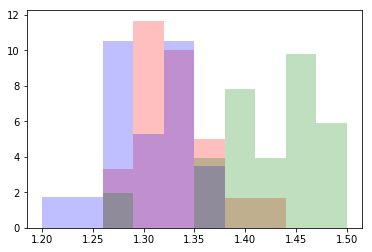

In [218]:
feature = 27
featureG = getFeature(feature,treeBranchMasterG)
featureH = getFeature(feature,treeBranchMasterH)
featureW = getFeature(feature,treeBranchMasterW)
meanG = [0] * len(featureG)
meanH = [0] * len(featureH)
meanW = [0] * len(featureW)
for i in range(0,20):
    meanG[i] = s.mean(featureG[i])
    meanH[i] = s.mean(featureH[i])
    meanW[i] = s.mean(featureW[i])
plt.hist(meanG,normed=True,bins=10,alpha=0.25,range=(1.2,1.5), color='r')
# plt.show()
plt.hist(meanH,normed=True,bins=10,alpha=0.25,range=(1.2,1.5), color='b')
# plt.show()
plt.hist(meanW,normed=True,bins=10,alpha=0.25,range=(1.2,1.5), color='g')


In [15]:
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Documents/UPenn/neuronData/neurons.csv")

In [16]:
indC = np.where(neurons['Experimental Condition']=='Control')[0]
indD = np.where(neurons['Species Name']=='drosophila melanogaster')[0]
indO = np.where(neurons['Primary Brain Region']=='optic Lobe')[0]
indP = np.where(neurons['Primary Brain Region']=='protocerebrum')[0]
swcO = [0] * 7099
swcP = [0] * 8890

counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indO[:] == indD[i]) :
        swcO[counter] = neurons['swc'][indD[i]]
        counter += 1

counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indP[:] == indD[i]) :
        swcP[counter] = neurons['swc'][indD[i]]
        counter += 1

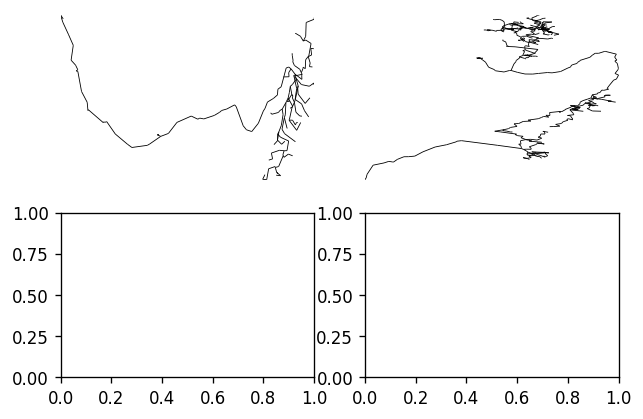

In [331]:
f,g = 2,2
fig, axis = plt.subplots(f,g)
fig.dpi=120
McNeuron.visualize.plot_2D(swcO[2346], pass_ax=True, ax=axis[0,0], line_width=McNeuron.Neuron(swcO[2346]).diameter)
McNeuron.visualize.plot_2D(swcP[3457], pass_ax=True, ax=axis[0,1], line_width=McNeuron.Neuron(swcP[3457]).diameter)

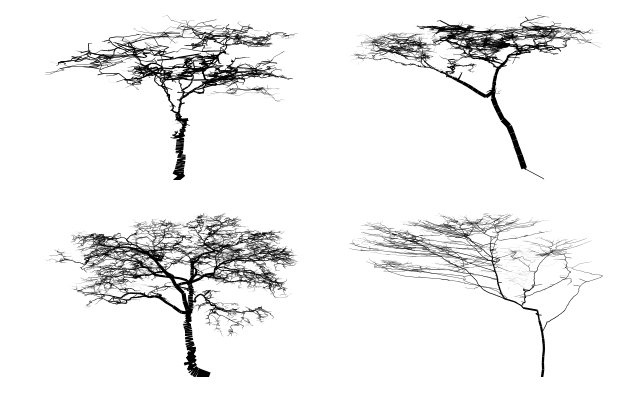

In [326]:
f,g = 2,2
fig, axis = plt.subplots(f,g)
fig.dpi=120
McNeuron.visualize.plot_2D(trees['swc'][6], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[0,0], line_width=McNeuron.Neuron(trees['swc'][6]).diameter*10)
McNeuron.visualize.plot_2D(trees['swc'][36], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[0,1], line_width=McNeuron.Neuron(trees['swc'][36]).diameter*10)
McNeuron.visualize.plot_2D(trees['swc'][59], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[1,0], line_width=McNeuron.Neuron(trees['swc'][59]).diameter*10)
McNeuron.visualize.plot_2D(trees['swc'][73], axis=(1,0,0), rotation=30, pass_ax=True, ax=axis[1,1], line_width=McNeuron.Neuron(trees['swc'][73]).diameter*10)

In [17]:
def getNeurons(swc, size, rand) :
    n = [0] * size
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        n[i] = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        if i%100==0 :
            print(i)
    print('done')
    return n,rand

In [200]:
size = 20
randO = np.linspace(0,len(swcO)-1,len(swcO))
randP = np.linspace(0,len(swcP)-1,len(swcP))
neuronO,randO = getNeurons(swcO, size, randO)
neuronP,randP = getNeurons(swcP, size, randP)
neuronO = np.vstack(neuronO)
neuronP = np.vstack(neuronP)

0
done
0
done


In [201]:
def getNeuronBranchMaster(arr):
    neuronBranchMaster = [0] * len(arr)
    for i in range (0,len(arr)) :
        n = arr[i,0]
        n.basic_features()
        neuronBranchMaster[i] = splitBranches(n)
        if i%10==0 :
            print(i)
    print('done')
    return neuronBranchMaster

In [202]:
neuronBranchMasterO = getNeuronBranchMaster(neuronO)
neuronBranchMasterP = getNeuronBranchMaster(neuronP)

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:998: RuntimeWarning:

Mean of empty slice.

/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



0


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:990: RuntimeWarning:

Mean of empty slice.



10
done
0
10
done


In [213]:
def getFeatureAnalysisMatrixNeuron(feature,ran) :
    featureO = getFeature(feature,neuronBranchMasterO)
    featureP = getFeature(feature,neuronBranchMasterP)
    matrix = np.zeros((2,2))
    ref = [featureO,featureP]
    ind = [[0,0],[0,1],[1,1],[1,0]]
    for v in range(0,4) :
        total = 0
        a = ref[ind[v][0]]
        b = ref[ind[v][1]]
        for i in range(0,len(featureO)) :
            start = 0
            if v%2==0 :
                start = i
            for j in range(start,len(featureO)) :
                pdf0 = np.histogram(a[i],normed=True, bins=20, range=ran)[0]
                pdf1 = np.histogram(b[j],normed=True, bins=20, range=ran)[0]
                pdf0 = pdf0/sum(pdf0)
                pdf1 = pdf1/sum(pdf1)
                if (stats.ks_2samp(pdf0,pdf1)[1] < 0.05) :
                    total += 1
        matrix[ind[v][0]][ind[v][1]] = total
        print(v)
    return matrix

In [251]:
getFeatureAnalysisMatrixNeuron(14, (8,28))

/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:842: RuntimeWarning:

invalid value encountered in true_divide



0
1
2
3


array([[110., 219.],
       [219., 100.]])

(array([0.14285714, 0.03571429, 0.07142857, 0.07142857, 0.03571429,
        0.03571429, 0.03571429, 0.03571429, 0.        , 0.03571429]),
 array([ 8., 10., 12., 14., 16., 18., 20., 22., 24., 26., 28.]),
 <a list of 10 Patch objects>)

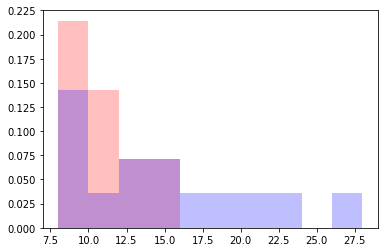

In [252]:
feature = 14
featureO = getFeature(feature,neuronBranchMasterO)
featureP = getFeature(feature,neuronBranchMasterP)
meanO = [0] * len(featureO)
meanP = [0] * len(featureP)
for i in range(0,len(featureO)):
    meanO[i] = s.mean(featureO[i])
    meanP[i] = s.mean(featureP[i])
plt.hist(meanO,normed=True,bins=10,alpha=0.25,range=(8,28), color='r')
# plt.show()
plt.hist(meanP,normed=True,bins=10,alpha=0.25,range=(8,28), color='b')
# plt.show()